![](https://cdn.pixabay.com/photo/2016/11/18/17/46/architecture-1836070_1280.jpg)

**REAL ESTATE-HOME PRICE PREDICTOR**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
df = pd.read_csv("data.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


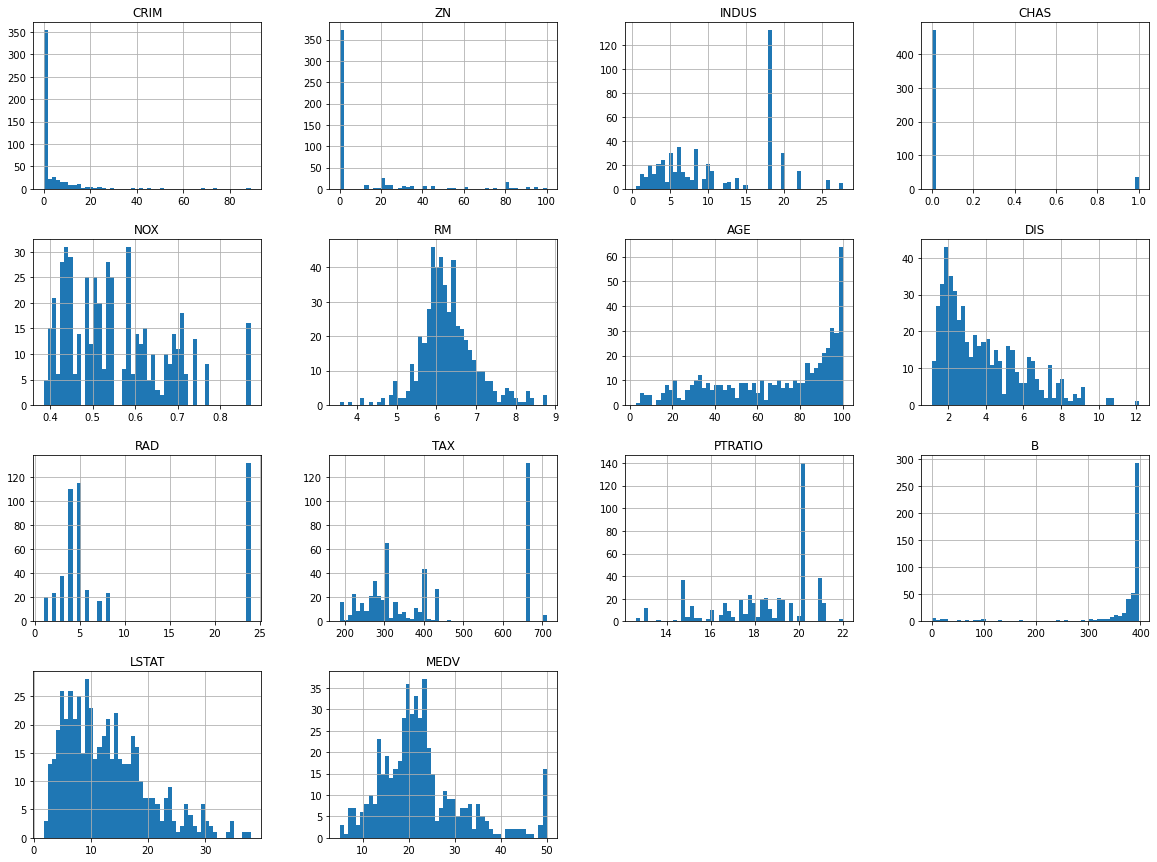

In [11]:
df.hist(bins=50,figsize=(20,15))
plt.show()

**TRAIN-TEST SPLITTING**

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['CHAS']):
  train_set = df.loc[train_index]
  test_set = df.loc[test_index]

In [15]:
len(train_set)

404

In [17]:
len(test_set)

102

In [19]:
x_train = train_set.drop('MEDV',axis=1)
y_train = train_set['MEDV']


In [21]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [23]:
y_train.head()

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

**GENERATING PIPELINE**

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
           ('imputer', SimpleImputer(strategy='median')),
           ('std_scale', StandardScaler())             

])

In [27]:
x_train1 = my_pipeline.fit_transform(x_train)

**SELECTION OF DESIRED MODEL**

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [31]:
model = RandomForestRegressor()
model.fit(x_train1,y_train)

RandomForestRegressor()

**EVALUATION OF MODEL - CROSS VALIDATION**

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train1, y_train, scoring='neg_mean_squared_error', cv=10)
rms_scores = np.sqrt(-scores)

In [35]:
rms_scores

array([2.76963503, 2.83151628, 4.50401985, 2.53033396, 3.48301937,
       2.63869622, 4.87790844, 3.30916999, 3.29588976, 3.10574012])

In [37]:
def print_scores(scores):
  print('scores:', scores)
  print('scores.mean:', scores.mean())
  print('scores.std:', scores.std())

In [39]:
print_scores(rms_scores)

scores: [2.76963503 2.83151628 4.50401985 2.53033396 3.48301937 2.63869622
 4.87790844 3.30916999 3.29588976 3.10574012]
scores.mean: 3.3345929013554354
scores.std: 0.7435925388378403


In [41]:
test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4


**TESTING MODEL**

In [43]:
x_test = test_set.drop('MEDV',axis=1)
y_test = test_set['MEDV']

In [45]:
X_test_prep = my_pipeline.transform(x_test)

In [47]:
model.predict(X_test_prep)

array([25.031, 11.919, 25.29 , 21.792, 18.862, 14.755, 20.131, 14.399,
       31.993, 42.186, 19.479, 12.203, 24.055, 28.506, 19.605, 11.255,
       31.972, 14.253, 23.789, 18.695, 20.033, 17.662, 17.409, 22.013,
       18.628, 30.907, 15.984, 32.681,  8.942, 33.607, 24.42 , 21.198,
       22.854, 10.811, 21.049, 11.071, 44.111, 24.535, 23.456, 41.306,
       24.157, 30.571, 20.5  , 21.014, 19.367, 33.465, 45.145, 20.407,
       20.026, 21.373, 21.31 , 14.632, 21.205, 15.095, 24.771, 33.549,
       41.16 , 29.406, 19.329, 20.974, 45.97 ,  9.973, 19.072, 25.341,
       14.713, 33.276, 20.058, 18.216, 19.341, 34.112, 25.528, 22.767,
       21.685, 22.381, 34.938, 12.624, 16.031, 20.221, 20.964, 21.813,
       22.675, 20.734, 14.239, 22.66 , 20.425, 21.054, 14.065, 21.81 ,
       21.33 , 23.662, 18.369, 27.318,  6.956, 26.279, 18.963, 29.64 ,
       20.232, 32.097, 14.265, 26.957, 21.42 , 20.342])

In [49]:
y_test

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64

In [51]:
model.score(X_test_prep,y_test)

0.8716432860784101

**SAVING MODEL**

In [53]:
import pickle

In [54]:
with open('price_predictor_model.pickle','wb') as f:
  pickle.dump(model, f)

**USING MODEL**

In [55]:
features = np.array([[0.02498,	0.0,	1.89,	0,	0.518,	6.540,	59.7,	6.2669,	1,	422,	15.9,	389.96,	8.65]])

In [56]:
model.predict(features)

array([23.377])